# WeatherPy

## Observations

Three observation that we can see are the following

* In the temperature vs Latitude plot we can see that both poles are not at the same temperature, the south pole is hotter.

* In the southern hemispher, wind speed tends to decrease as we get closer to the equator, but it is the opposite with the humidity, it increases as we reach the equator.

* The wind speed is higher in the northern hemisphere, and increses as it gets closer to the north pole.

### Extracting Data

In [33]:
import pandas as pd
import numpy as np
import json 
from citipy import citipy
import requests
import matplotlib.pyplot as plt

In [34]:
# Latitues and longitudes 
coordinates = pd.DataFrame({"Lat":(np.random.uniform(-90,90,1500)), "Long":(np.random.uniform(-180,180,1500))})
coordinates.head()

,Lat,Long
0,9.760717,-37.178188
1,41.214280,-79.421006
2,-25.636030,112.108690
3,-65.934167,32.932313
4,-86.358292,154.758051


In [35]:
# Finding the closest city to the generated coordinates
cities_name = []
countrycode = []

for i in range(0, len(coordinates["Lat"])):
    lat = coordinates.iloc[i]["Lat"]
    long = coordinates.iloc[i]["Long"]
    city = citipy.nearest_city(lat, long)
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
coordinates['City'] = cities_name
coordinates['Country'] = countrycode
coordinates.head()

,Lat,Long,City,Country
0,9.760717,-37.178188,itarema,br
1,41.214280,-79.421006,oil city,us
2,-25.636030,112.108690,carnarvon,au
3,-65.934167,32.932313,port elizabeth,za
4,-86.358292,154.758051,bluff,nz


In [36]:
# Deleting duplicated cities
cities = coordinates.drop_duplicates("City", keep='first')
cities.head()

,Lat,Long,City,Country
0,9.760717,-37.178188,itarema,br
1,41.214280,-79.421006,oil city,us
2,-25.636030,112.108690,carnarvon,au
3,-65.934167,32.932313,port elizabeth,za
4,-86.358292,154.758051,bluff,nz


In [37]:
len(cities)

623

In [38]:
# Creating the new columns
cities["Temperature (F)"] = ""
cities["Humidity (%)"] = ""
cities["Cloudiness (%)"] = ""
cities["Wind Speed (mph)"] = ""

cities.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Lat,Long,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,9.760717,-37.178188,itarema,br,,,,
1,41.214280,-79.421006,oil city,us,,,,
2,-25.636030,112.108690,carnarvon,au,,,,
3,-65.934167,32.932313,port elizabeth,za,,,,
4,-86.358292,154.758051,bluff,nz,,,,


### Retrieving the weather data for each city

In [39]:
api_key_ow = "e8ae1d64d3f4b7106a1387aa650596ea"

url = "http://api.openweathermap.org/data/2.5/weather?"

# Query url
query_url = url + "appid=" + api_key_ow + "&q="

In [41]:
for index, row in cities.iterrows():
    response = requests.get(query_url + row["City"].replace(" ","+") + "&units=imperial").json()
    results = response
    #print(row["City"].replace(" ","+"))
    print(query_url + row["City"].replace(" ","+") + "&units=imperial")
    
    try:
        print(f"Retrieving results for Index = {index}: {row[2]}")
        cities.loc[index, "Temperature (F)"] = results["main"]["temp"]
        cities.loc[index, "Humidity (%)"] = results["main"]["humidity"]
        cities.loc[index, "Cloudiness (%)"] = results["clouds"]["all"]
        cities.loc[index, "Wind Speed (mph)"] = results["wind"]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
    
    
    

http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=itarema&units=imperial
Retrieving results for Index = 0: itarema


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=oil+city&units=imperial
Retrieving results for Index = 1: oil city
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=carnarvon&units=imperial
Retrieving results for Index = 2: carnarvon
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=port+elizabeth&units=imperial
Retrieving results for Index = 3: port elizabeth
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=bluff&units=imperial
Retrieving results for Index = 4: bluff
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=taolanaro&units=imperial
Retrieving results for Index = 5: taolanaro
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=rikitea&units=i

http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=yara&units=imperial
Retrieving results for Index = 54: yara
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=portland&units=imperial
Retrieving results for Index = 55: portland
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=alekseyevka&units=imperial
Retrieving results for Index = 57: alekseyevka
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=shiraz&units=imperial
Retrieving results for Index = 58: shiraz
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=ilulissat&units=imperial
Retrieving results for Index = 59: ilulissat
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=attawapiskat&units=imperial
Retrieving results for Index = 62: attawapi

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=barentsburg&units=imperial
Retrieving results for Index = 127: barentsburg
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=diu&units=imperial
Retrieving results for Index = 131: diu
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=high+level&units=imperial
Retrieving results for Index = 132: high level
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=samusu&units=imperial
Retrieving results for Index = 135: samusu
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=sioux+lookout&units=imperial
Retrieving results for Index = 136: sioux lookout
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=kieta&units=imperial
Retrieving results for Index = 224: kieta
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=kirakira&units=imperial
Retrieving results for Index = 228: kirakira
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=ous&units=imperial
Retrieving results for Index = 231: ous
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=synya&units=imperial
Retrieving results for Index = 232: synya
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=salalah&units=imperial
Retrieving results for Index = 233: salalah
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=thompson&units=imperial
Retrieving results for Index = 236: thompson
----

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=mahibadhoo&units=imperial
Retrieving results for Index = 319: mahibadhoo
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=ballina&units=imperial
Retrieving results for Index = 320: ballina
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=darab&units=imperial
Retrieving results for Index = 321: darab
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=gimbi&units=imperial
Retrieving results for Index = 325: gimbi
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=maputo&units=imperial
Retrieving results for Index = 326: maputo
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=isangel&units=imperial
Retrieving results for Index = 329: isan

http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=koshurnikovo&units=imperial
Retrieving results for Index = 408: koshurnikovo
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=fort+nelson&units=imperial
Retrieving results for Index = 411: fort nelson
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=winneba&units=imperial
Retrieving results for Index = 412: winneba
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=tessalit&units=imperial
Retrieving results for Index = 413: tessalit
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=marcona&units=imperial
Retrieving results for Index = 414: marcona
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=ust-kamchatsk&unit

http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=serpa&units=imperial
Retrieving results for Index = 511: serpa
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=bud&units=imperial
Retrieving results for Index = 512: bud
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=verkh-usugli&units=imperial
Retrieving results for Index = 516: verkh-usugli
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=sainte-marie&units=imperial
Retrieving results for Index = 518: sainte-marie
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=sinnamary&units=imperial
Retrieving results for Index = 524: sinnamary
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=san+andres&units=imperial
Retrieving results for Index = 529

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=wicklow&units=imperial
Retrieving results for Index = 623: wicklow
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=sudzha&units=imperial
Retrieving results for Index = 624: sudzha
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=panindicuaro&units=imperial
Retrieving results for Index = 625: panindicuaro
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=muros&units=imperial
Retrieving results for Index = 628: muros
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=pringsewu&units=imperial
Retrieving results for Index = 631: pringsewu
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=blagoyevo&units=imperial
Retrieving results for Ind

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=leo&units=imperial
Retrieving results for Index = 742: leo
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=tabas&units=imperial
Retrieving results for Index = 743: tabas
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=shunyi&units=imperial
Retrieving results for Index = 753: shunyi
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=balkhash&units=imperial
Retrieving results for Index = 754: balkhash
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=bartlesville&units=imperial
Retrieving results for Index = 759: bartlesville
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=saint+john&units=imperial
Retrieving results for Index = 762:

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=gao&units=imperial
Retrieving results for Index = 881: gao
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=lazaro+cardenas&units=imperial
Retrieving results for Index = 885: lazaro cardenas
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=cockburn+town&units=imperial
Retrieving results for Index = 886: cockburn town
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=vostok&units=imperial
Retrieving results for Index = 887: vostok
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=ilave&units=imperial
Retrieving results for Index = 889: ilave
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=la+ronge&units=imperial
Retrieving results fo

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=gangotri&units=imperial
Retrieving results for Index = 1013: gangotri
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=port+augusta&units=imperial
Retrieving results for Index = 1014: port augusta
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=cap-aux-meules&units=imperial
Retrieving results for Index = 1020: cap-aux-meules
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=kunming&units=imperial
Retrieving results for Index = 1027: kunming
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=dawei&units=imperial
Retrieving results for Index = 1029: dawei
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=sterling&units=imperial
Retrieving results for Index = 1136: sterling
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=yeniseysk&units=imperial
Retrieving results for Index = 1139: yeniseysk
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=yichang&units=imperial
Retrieving results for Index = 1142: yichang
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=matadi&units=imperial
Retrieving results for Index = 1143: matadi
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=elblag&units=imperial
Retrieving results for Index = 1166: elblag
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=svetlaya&units=imperial
Retrieving results for Index

------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=trapani&units=imperial
Retrieving results for Index = 1283: trapani
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=xining&units=imperial
Retrieving results for Index = 1290: xining
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=tostamaa&units=imperial
Retrieving results for Index = 1296: tostamaa
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=port+shepstone&units=imperial
Retrieving results for Index = 1297: port shepstone
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1d64d3f4b7106a1387aa650596ea&q=saleaula&units=imperial
Retrieving results for Index = 1298: saleaula
Missing field/result... skipping.
------------
http://api.openweathermap.org/data/2.5/weather?appid=e8ae1

------------


In [42]:
cities.head()

,Lat,Long,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,9.760717,-37.178188,itarema,br,77.63,87,0,7.81
1,41.214280,-79.421006,oil city,us,37.31,94,90,9.17
2,-25.636030,112.108690,carnarvon,au,76.73,43,0,7.38
3,-65.934167,32.932313,port elizabeth,za,62.6,82,40,4.7
4,-86.358292,154.758051,bluff,nz,53.08,71,6,12.77


In [43]:
# Saving the dataframe to a csv file
cities.to_csv("Weather_per_city.csv", encoding = "utf-8", index = False)

In [44]:
cities["Lat"] = pd.to_numeric(cities["Lat"])
cities["Temperature (F)"] = pd.to_numeric(cities["Temperature (F)"])
cities["Humidity (%)"] = pd.to_numeric(cities["Humidity (%)"])
cities["Cloudiness (%)"] = pd.to_numeric(cities["Cloudiness (%)"])
cities["Wind Speed (mph)"] = pd.to_numeric(cities["Wind Speed (mph)"])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

## Plotting data

### Temperature (F) vs. Latitude

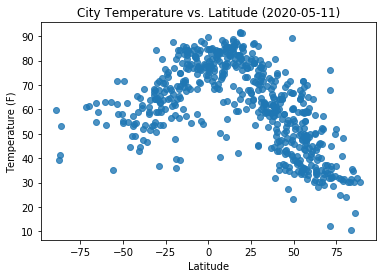

In [53]:
plt.scatter(cities["Lat"], cities["Temperature (F)"], alpha = 0.8)
plt.title("City Temperature vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("City_Temperature-Latitude.png")
plt.show()

In this plot we analysed the temperature as a function of the latitude. We can see that when latitude is zero, the temperature is higher, which is supposed to happen in the equator

### Humidity (%) vs. Latitude

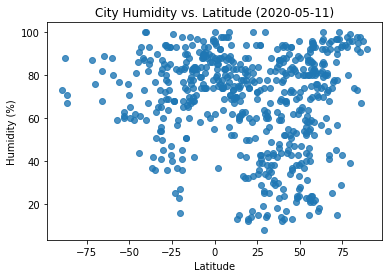

In [54]:
# Plot of Humidity (%) vs. Latitude
plt.scatter(cities["Lat"], cities["Humidity (%)"], alpha = 0.8)
plt.title("City Humidity vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("City_Humidity-Latitude.png")
plt.show()

In this plot we can see a city's humidity as a function of the latitude. We can see that the more humid cities are located in the north hemisphere.

### Cloudiness (%) vs. Latitude

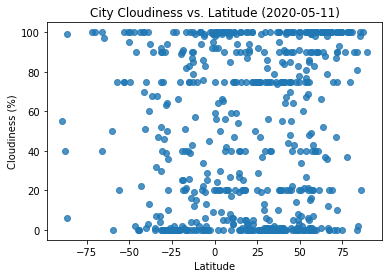

In [55]:
# Plot of Cloudiness (%) vs. Latitude
plt.scatter(cities["Lat"], cities["Cloudiness (%)"], alpha = 0.8)
plt.title("City Cloudiness vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("City_Cloudiness-Latitude.png")
plt.show()

The cloudyness in a city is plotted here as a function of the latitude. It almost seems that cities with a certain temperature have the same percentage of cloudiness.

### Wind Speed (mph) vs. Latitude

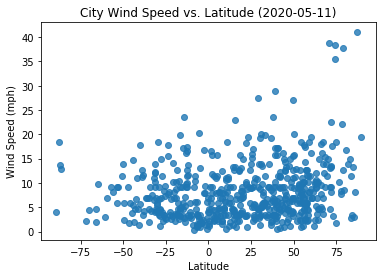

In [56]:
# Plot of Wind Speed (mph) vs. Latitude
plt.scatter(cities["Lat"], cities["Wind Speed (mph)"], alpha = 0.8)
plt.title("City Wind Speed vs. Latitude (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("City_wind_speed-Latitude.png")
plt.show()

In this plot we see the wind speed in a city as a function of the latitude. It seems that, in general, the wind speed stays below 20 mph all around the world.

## Linear regression for each hemisphere

In [57]:
from scipy.stats import linregress

# Function to compute regressions
def regression(xs, ys):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xs, ys)
    regress_values = xs * slope + intercept
    plt.plot(xs, regress_values, "r-")
    return slope, intercept

In [58]:
# Dividing the dataframe into positive and negative latitude values
cities = cities.dropna()
lat_positive = cities.loc[(cities["Lat"]>=0)]
lat_negative = cities.loc[(cities["Lat"]<0)]

### Northern and Southern Hemispheres - Temperature (F) vs. Latitude

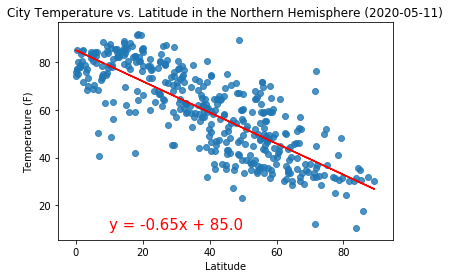

In [63]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Temperature (F)"]

m, b = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (10,10), fontsize=15, color="red")
plt.title("City Temperature vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Northern_city_temperature-Latitude.png")
plt.show()

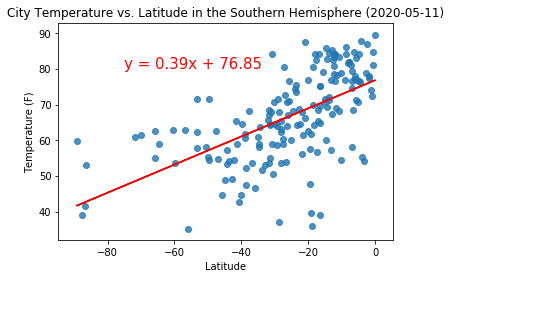

In [64]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Temperature (F)"]

m, b = regression(x, y)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-75,80), fontsize=15, color="red")
plt.scatter(x, y, alpha = 0.8)

plt.annotate(line_eq, (10,10), fontsize=15, color="red")
plt.title("City Temperature vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Southern_city_temperature-Latitude.png")
plt.show()

In the northern hemisphere plot we are doing a linear regression that is modeling the City's temperature as a function of the latitude in the northern hemisphere. We notice that as the latitude increases the temperature decreases.

In the southern hemisphere plot we have the regression that shows a positive slope, which means that the temperature rises as we approach the equator.

### Northern and Southern Hemispheres - Humidity (%) vs. Latitude

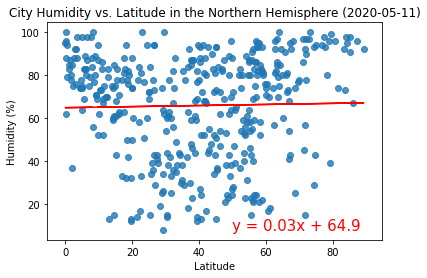

In [65]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Humidity (%)"]

m, b = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (50,8), fontsize=15, color="red")
plt.title("City Humidity vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Northern_city_humidity-Latitude.png")
plt.show()

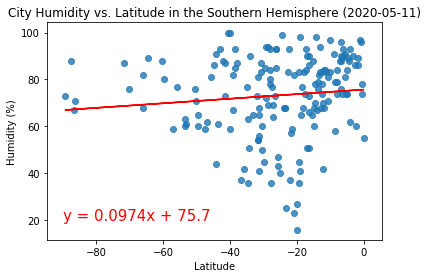

In [66]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Humidity (%)"]

m, b = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 4)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-90,20), fontsize=15, color="red")
plt.title("City Humidity vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Southern_city_humidity-Latitude.png")
plt.show()

In the first plot (northern hemisphere) we have a linear regression of humidity as a function of the latitude. We notice that there is no trend in the humidity of a city.

In the second plot, we did a linear regression as well, but now, in the southern hemisphere. Here we can see that the mayority of humid cities are closer to the equator.

### Northern and Southern Hemispheres - Cloudiness (%) vs. Latitude

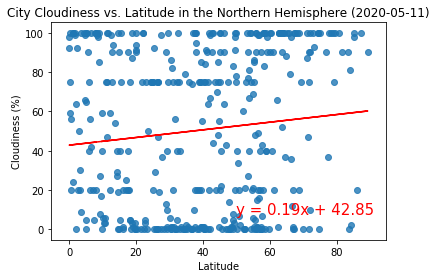

In [67]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Cloudiness (%)"]

m, b = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (50,8), fontsize=15, color="red")
plt.title("City Cloudiness vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Northern_city_cloudiness-Latitude.png")
plt.show()

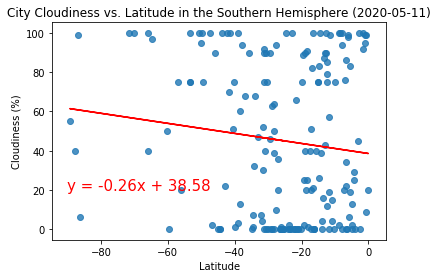

In [68]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Cloudiness (%)"]

m, b = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-90,20), fontsize=15, color="red")
plt.title("City Cloudiness vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Southern_city_cloudiness-Latitude.png")
plt.show()

In these two plot we have a linear regession of the cloudiness of a city as a function of the latitude. In the first plot (norhern hemisphere), we see that the data is spread out. With a tendency to have more cities with either no clouds or completely cloudy.

In the southern hemisphere (second plot) we see a negative trend in the cloudinees, and we see that the contries with more clouds are the ones closest to the equator.

### Northern and Southern Hemispheres - Wind Speed (mph) vs. Latitude

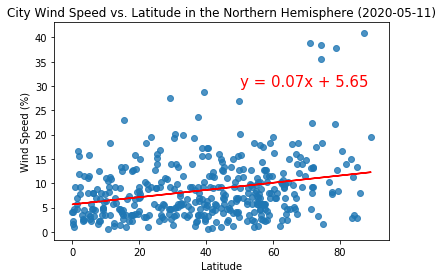

In [69]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = lat_positive["Lat"]
y = lat_positive["Wind Speed (mph)"]

m, b = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (50,30), fontsize=15, color="red")
plt.title("City Wind Speed vs. Latitude in the Northern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.savefig("Northern_city_wind-Latitude.png")
plt.show()

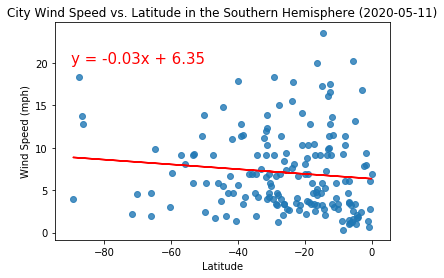

In [70]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = lat_negative["Lat"]
y = lat_negative["Wind Speed (mph)"]

m, b = regression(x, y)
plt.scatter(x, y, alpha = 0.8)

line_eq = "y = " + str(round(m, 2)) + "x + " + str(round(b, 2))
plt.annotate(line_eq, (-90,20), fontsize=15, color="red")
plt.title("City Wind Speed vs. Latitude in the Southern Hemisphere (2020-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Southern_city_wind-Latitude.png")
plt.show()

In the final two plots we have a regression on both, the northern and southern hemispheres, of the wind speed in a city.

In the northern hemisphere the trend is positive and the wind speed stays, in general, below 20 mph. In the southern hemisphere we have a negative trend, which again shows a cities with a wind speed below 20 mph, but now, decreasing as the city get closer to the equator.